In [39]:
from tools import tool
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

#这个分析没有意义
#获取招聘数量与发布时间
sql="""
	SELECT publish_date,recruit_num FROM zhilian_job;
"""
df=pd.read_sql(sql,tool.get_connnect()).dropna()
df.tail()

,publish_date,recruit_num
481202,2018-01-21 09:03:38,2
481203,2018-01-25 13:11:32,5
481204,2018-01-09 11:13:58,1
481205,2018-01-22 09:33:00,1
481206,2018-01-17 14:49:04,4


In [101]:
df['publish_date']=df['publish_date'].apply(lambda x:x.split(' ')[0][:-3])
df.tail()

,publish_date,recruit_num
481202,2018-01,2
481203,2018-01,5
481204,2018-01,1
481205,2018-01,1
481206,2018-01,4


In [103]:
grouped=pd.DataFrame(df.groupby('publish_date').size()).reset_index().rename(columns={0:'recruit_num'})
is_valid=grouped['publish_date']>='2017-01'
concat_valid=pd.concat([grouped,pd.DataFrame(is_valid).rename(columns={'publish_date':'is_valid'})],axis=1)
df_valid=concat_valid[concat_valid['is_valid']==True]
df_valid.head(10)

,publish_date,recruit_num,is_valid
28,2017-01,135,True
29,2017-02,207,True
30,2017-03,620,True
31,2017-04,4679,True
32,2017-05,1818,True
33,2017-06,1846,True
34,2017-07,1335,True
35,2017-08,3308,True
36,2017-09,5578,True
37,2017-10,8932,True


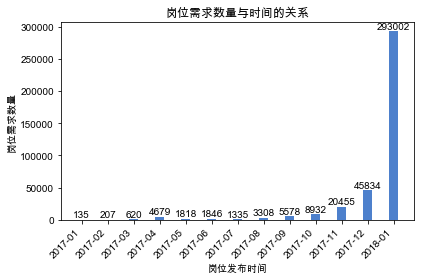

In [114]:
#可视化
#https://matplotlib.org/gallery/statistics/barchart_demo.html

fig,ax=plt.subplots()
# 设置中文字体
plt.rcParams['font.sans-serif'] = ['Arial Unicode MS']
plt.rcParams['axes.unicode_minus'] = False

bar_width=0.35
opacity=1
error_config={'ecolor':'0.3'}

ax.bar(df_valid['publish_date'],df_valid['recruit_num'],bar_width,alpha=opacity,color=(0.3,0.5,0.8))

ax.set(xlabel='岗位发布时间',ylabel='岗位需求数量',title='岗位需求数量与时间的关系')
ax.set_xticklabels(df_valid['publish_date'])
#设置lable旋转
labels=ax.get_xticklabels()
plt.setp(labels,rotation=45,horizontalalignment='right')

#设置数字标签
for x,y in zip(df_valid['publish_date'],df_valid['recruit_num']):
	plt.text(x,y+100,y,ha='center',va='bottom',fontsize=10)

ax.legend()

fig.tight_layout()
plt.show()

fig.savefig('{}.png'.format(ax.get_title()), transparent=False, dpi=80, bbox_inches="tight")